# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '..//traffic-signs-data//train.p'
validation_file= '..//traffic-signs-data//valid.p'
testing_file = '..//traffic-signs-data//test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

traffic_sign_name = []
import csv
with open('signnames.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csvreader:
        if (csvreader.line_num > 1):
            traffic_sign_name.append(row)
    #print (traffic_sign_name)
    # TODO: How many unique classes/labels there are in the dataset.
    n_classes = csvreader.line_num - 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 209, 210]


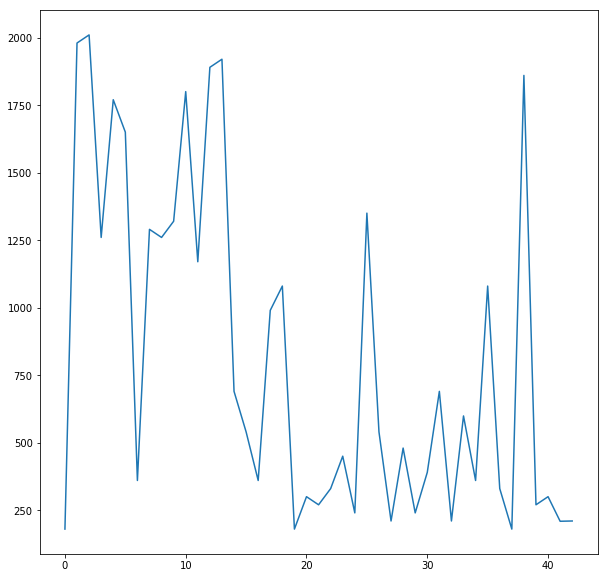

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np

# Visualizations will be shown in the notebook.
%matplotlib inline

hist = [0 for j in range(0,n_classes)]

#Count each sign
for i in range(1,len(X_train)):
    if (y_train[i] < n_classes):
        hist[y_train[i]] += 1

#plot the count of each sign       
plt.figure(figsize=(10,10))
pltx = np.arange(0, n_classes, 1)
plty = hist
plt.plot(pltx,plty)        
print(hist)

<class 'numpy.ndarray'> (34799, 32, 32, 3)
<class 'numpy.ndarray'> (34799,)


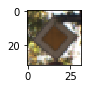

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

print(type(X_train), X_train.shape )
print(type(y_train), y_train.shape)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
# Problem 1 - Implement Min-Max scaling for grayscale image data
def preprocess_image(image_data):

    img_grey = cv2.cvtColor(image_data, cv2.COLOR_RGB2GRAY)
    img_grey.resize(32,32,1)
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (img_grey - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
    #return(image_data)



(32, 32, 3)
(32, 32, 1)


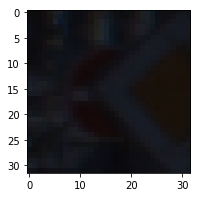

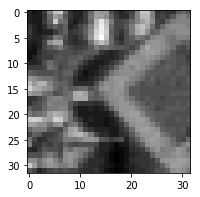

In [6]:
import cv2

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(3,3))
print (image.shape)
plt.imshow(image)

img_grey = preprocess_image(image)
plt.figure(figsize=(3,3))
print (img_grey.shape)
imagegrey = img_grey.squeeze()
plt.imshow(imagegrey, cmap="gray")
#print(img_grey)


In [7]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2
import numpy as np

def augment_brightness(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = 0.5 + np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)

    return image1

def transform_image(image,angle,shear,translation):

    # Rotation
    ang_rot = np.random.uniform(angle)-angle/2
    #rows,cols,ch = image.shape    
    rows,cols,ch = image.shape
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = translation*np.random.uniform()-translation/2
    tr_y = translation*np.random.uniform()-translation/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear*np.random.uniform()-shear/2
    pt2 = 20+shear*np.random.uniform()-shear/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    
    #Brightness augmentation
    image = augment_brightness(image)
    
    return image

# Preprocessing 
def augument_image_dataset(image):
    return transform_image(image,5,5,5)

In [8]:
import os
import pickle

def save_pickle(pickle_file,trainset,labelset):
    if not os.path.isfile(pickle_file):
        print('Saving data to pickle file',pickle_file,'...')
        try:
            with open(pickle_file, 'wb') as pfile:
                pickle.dump(
                    {
                        'train_dataset': trainset,
                        'train_labels': labelset,
                    },
                    pfile, pickle.HIGHEST_PROTOCOL)
        except Exception as e:
            print('Unable to save data to', pickle_file, ':', e)
            raise

    print('Data cached in pickle file.')
    return

In [9]:
def append_pickle(pickle_file,trainset,labelset):
    #if not os.path.isfile(pickle_file):
    print('appending data to pickle file',pickle_file,'...')
    try:
        with open(pickle_file, 'ab') as pfile:
            pickle.dump(
                {
                    'train_dataset': trainset,
                    'train_labels': labelset,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

    return

In [10]:
# The inital train data set has more images in one class and few images in another class
# Hence the training could be biased to the classes with more images.
# Add more images in the class with few original images. 
# This is done by affine transformation (rotation, shear, translation) of exisitng images 
# Preprocessing: Convert the existing images with 3 channesl (R,G,B) 32x32x3 to greyscale (32x32x1) and normalize from 0.1 to 0.9

# Calculate count of images in each class of the training data set
hist1 = [0 for j in range(0,n_classes)]
for i in range(1,len(X_train)):        
    if (y_train[i] < 43):
        hist1[y_train[i]] += 1

# Create 4 more data sets with part of the original image set + rest of images got from augumented imageset
sets = 4
hist_per_label = 800
dataset_size = hist_per_label * n_classes
mark_train_copy = [0 for j in range(0,len(X_train))]

y_temp = np.zeros(dataset_size,int)
X_temp = np.zeros((dataset_size,32,32,1))

hist_copy_cnt = [0 for j in range(0,n_classes)]
hist_aug_cnt  = [0 for j in range(0,n_classes)]
hist_loop_aug = [0 for j in range(0,n_classes)]
hist_sing_cnt = [0 for j in range(0,n_classes)]

hist_copy_i = [0 for j in range(0,n_classes)]
hist_aug_i  = [0 for j in range(0,n_classes)]
hist_loop_i = [0 for j in range(0,n_classes)]
hist_sing_i = [0 for j in range(0,n_classes)]

for j in range(0,n_classes):
    hist_copy_cnt[j] = int(hist1[j]/sets)
    hist_aug_cnt[j] = hist_per_label - hist_copy_cnt[j]
    hist_loop_aug[j] = int(hist_aug_cnt[j] / hist_copy_cnt[j])
    hist_sing_cnt[j] = hist_per_label - (hist_loop_aug[j] * hist_copy_cnt[j] + hist_copy_cnt[j])

for set_cnt in range (0, sets):
    hist_copy_i = [0 for j in range(0,n_classes)]
    hist_sing_i = [0 for j in range(0,n_classes)]
    
    image = X_train[0].squeeze()
    defaultimg= preprocess_image(image)
    
    for ctr in range(0,dataset_size):
        X_temp[ctr] = defaultimg 
        y_temp[ctr] = y_train[0]
    
    ctr = 0
    
    for i in range(0,len(X_train)):
        if ctr <= dataset_size:
            c = y_train[i]
            if hist_copy_i[c] < hist_copy_cnt[c]:
                #Copy from original dataset
                if mark_train_copy[i] == 0:
                    mark_train_copy[i] = 1
                    hist_copy_i[c] = hist_copy_i[c] + 1                    
                    
                    image = X_train[i].squeeze()
                    X_temp[ctr] = preprocess_image(image)
                    y_temp[ctr] = y_train[i]
                    ctr = ctr + 1
                    
                    #Augument dataset in loop
                    if hist_loop_aug[c] > 0:
                        for j in range(0,hist_loop_aug[c]):
                            image = X_train[i].squeeze()
                            image1 = augument_image_dataset(image)
                            X_temp[ctr] = preprocess_image(image1)
                            y_temp[ctr] = y_train[i]
                            ctr = ctr + 1
                    
                    #Augument dataset till topup
                    if hist_sing_i[c] < hist_sing_cnt[c]:
                        hist_sing_i[c] = hist_sing_i[c] + 1
                        image = X_train[i].squeeze()
                        image1 = augument_image_dataset(image)
                        X_temp[ctr] = preprocess_image(image1)
                        y_temp[ctr] = y_train[i]
                        ctr = ctr + 1
                        
    #print('ctr',ctr)
    #print('X_temp shape',X_temp.shape)
    #print('hist after augmentation')
    hist1 = [0 for j in range(0,n_classes)]
    for i in range(0,len(X_temp)):        
        if (y_temp[i] < 43):
            hist1[y_temp[i]] += 1
    #print (hist1)
    
    #print('hist_copy_i',hist_copy_cnt)
    #print('hist_sing_i',hist_sing_i)
    
    # save the dataset to pickle files
    save_pickle('train'+str(set_cnt)+'.pickle',X_temp,y_temp)

X_valid1 = np.zeros((len(X_valid),32,32,1))
X_test1 = np.zeros((len(X_test),32,32,1))        

# preprocess the validation set
for i in range(0,len(X_valid)):
    image = X_valid[i].squeeze()
    X_valid1[i] = preprocess_image(image)

# preprocess the Test set    
for i in range(0,len(X_test)):
    image = X_test[i].squeeze()
    X_test1[i] = preprocess_image(image)

Saving data to pickle file train0.pickle ...
Data cached in pickle file.
Saving data to pickle file train1.pickle ...
Data cached in pickle file.
Saving data to pickle file train2.pickle ...
Data cached in pickle file.
Saving data to pickle file train3.pickle ...
Data cached in pickle file.


In [21]:
# Preprocess the orginal training set.
# Save this in pickle file 
# This will be used in final rounds of training
X_temp = np.zeros((len(X_train),32,32,1))
y_temp = np.copy(y_train)
for i in range(0,len(X_train)):
    image = X_train[i].squeeze()
    X_temp[i] = preprocess_image(image)
save_pickle('train_original.pickle',X_temp,y_temp)

Saving data to pickle file train_original.pickle ...
Data cached in pickle file.


In [11]:
# Function to Reload the data from pickle file
def reload_pickle(pickle_file):
    #pickle_file = 'train1.pickle'
    with open(pickle_file, 'rb') as f:
      pickle_data = pickle.load(f)
      trainset = pickle_data['train_dataset']
      labelset = pickle_data['train_labels']
      del pickle_data  # Free up memory
    print('Data loaded from ', pickle_file)
    return trainset,labelset

### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
#X_train2, y_train1 = shuffle(X_train2, y_train1)

import tensorflow as tf
EPOCHS = 8
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [13]:
from tensorflow.contrib.layers import flatten

rate = 0.0005

#logits = LeNet(x)
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

# SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

# SOLUTION: Activation.
conv1 = tf.nn.relu(conv1)

# SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

# SOLUTION: Activation.
conv2 = tf.nn.relu(conv2)

# SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Flatten. Input = 5x5x16. Output = 400.
fc0   = flatten(conv2)

# SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(120))
fc1   = tf.matmul(fc0, fc1_W) + fc1_b

# SOLUTION: Activation.
fc1    = tf.nn.relu(fc1)

# SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(84))
fc2    = tf.matmul(fc1, fc2_W) + fc2_b

# SOLUTION: Activation.
fc2    = tf.nn.relu(fc2)

# SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(43))
logits = tf.matmul(fc2, fc3_W) + fc3_b

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
import time
import datetime

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #num_examples = len(X_train2)
    print("Training...")
    print()
    for i in range(EPOCHS):
        ts = time.time()
        print("EPOCH {} ...".format(i+1),datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
        for j in range (0,sets,1):
            X_trainset, y_trainset = reload_pickle('train'+str(j)+'.pickle')
            X_trainset, y_trainset = shuffle(X_trainset, y_trainset)
            num_examples = len(X_trainset)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_trainset[offset:end], y_trainset[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            train_accuracy = evaluate(X_trainset, y_trainset)
            #print("Train Accuracy = {:.3f}".format(train_accuracy))
            validation_accuracy = evaluate(X_valid1, y_valid)
            print("Train Accuracy = {:.3f}".format(train_accuracy),"Validation Accuracy = {:.3f}".format(validation_accuracy))

    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ... 2017-03-25 17:13:52
Data loaded from  train0.pickle
Train Accuracy = 0.339 Validation Accuracy = 0.207
Data loaded from  train1.pickle
Train Accuracy = 0.460 Validation Accuracy = 0.395
Data loaded from  train2.pickle
Train Accuracy = 0.523 Validation Accuracy = 0.480
Data loaded from  train3.pickle
Train Accuracy = 0.587 Validation Accuracy = 0.570
EPOCH 2 ... 2017-03-25 17:22:53
Data loaded from  train0.pickle
Train Accuracy = 0.661 Validation Accuracy = 0.591
Data loaded from  train1.pickle
Train Accuracy = 0.711 Validation Accuracy = 0.650
Data loaded from  train2.pickle
Train Accuracy = 0.707 Validation Accuracy = 0.656
Data loaded from  train3.pickle
Train Accuracy = 0.747 Validation Accuracy = 0.724
EPOCH 3 ... 2017-03-25 17:31:37
Data loaded from  train0.pickle
Train Accuracy = 0.767 Validation Accuracy = 0.705
Data loaded from  train1.pickle
Train Accuracy = 0.773 Validation Accuracy = 0.708
Data loaded from  train2.pickle
Train Accuracy = 0.806 Valida

In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    print("Continue Training...")
    print()
    for i in range(EPOCHS):
        ts = time.time()
        print("EPOCH {} ...".format(i+1),datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
        for j in range (0,sets,1):
            X_trainset, y_trainset = reload_pickle('train'+str(j)+'.pickle')
            X_trainset, y_trainset = shuffle(X_trainset, y_trainset)
            num_examples = len(X_trainset)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_trainset[offset:end], y_trainset[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            train_accuracy = evaluate(X_trainset, y_trainset)
            #print("Train Accuracy = {:.3f}".format(train_accuracy))
            validation_accuracy = evaluate(X_valid1, y_valid)
            print("Train Accuracy = {:.3f}".format(train_accuracy),"Validation Accuracy = {:.3f}".format(validation_accuracy))

    saver.save(sess, './lenet')
    print("Model saved")

Continue Training...

EPOCH 1 ... 2017-03-25 18:26:20
Data loaded from  train0.pickle
Train Accuracy = 0.927 Validation Accuracy = 0.852
Data loaded from  train1.pickle
Train Accuracy = 0.932 Validation Accuracy = 0.841
Data loaded from  train2.pickle
Train Accuracy = 0.932 Validation Accuracy = 0.861
Data loaded from  train3.pickle
Train Accuracy = 0.924 Validation Accuracy = 0.857
EPOCH 2 ... 2017-03-25 18:35:15
Data loaded from  train0.pickle
Train Accuracy = 0.939 Validation Accuracy = 0.856
Data loaded from  train1.pickle
Train Accuracy = 0.943 Validation Accuracy = 0.846
Data loaded from  train2.pickle
Train Accuracy = 0.939 Validation Accuracy = 0.860
Data loaded from  train3.pickle
Train Accuracy = 0.939 Validation Accuracy = 0.876
EPOCH 3 ... 2017-03-25 18:44:01
Data loaded from  train0.pickle
Train Accuracy = 0.937 Validation Accuracy = 0.860
Data loaded from  train1.pickle
Train Accuracy = 0.945 Validation Accuracy = 0.854
Data loaded from  train2.pickle
Train Accuracy = 0.9

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    print("Continue Training...")
    print()
    for i in range(EPOCHS):
        ts = time.time()
        print("EPOCH {} ...".format(i+1),datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
        for j in range (0,sets,1):
            X_trainset, y_trainset = reload_pickle('train'+str(j)+'.pickle')
            X_trainset, y_trainset = shuffle(X_trainset, y_trainset)
            num_examples = len(X_trainset)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_trainset[offset:end], y_trainset[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            train_accuracy = evaluate(X_trainset, y_trainset)
            #print("Train Accuracy = {:.3f}".format(train_accuracy))
            validation_accuracy = evaluate(X_valid1, y_valid)
            print("Train Accuracy = {:.3f}".format(train_accuracy),"Validation Accuracy = {:.3f}".format(validation_accuracy))

    saver.save(sess, './lenet')
    print("Model saved")

Continue Training...

EPOCH 1 ... 2017-03-25 19:36:31
Data loaded from  train0.pickle
Train Accuracy = 0.963 Validation Accuracy = 0.877
Data loaded from  train1.pickle
Train Accuracy = 0.970 Validation Accuracy = 0.881
Data loaded from  train2.pickle
Train Accuracy = 0.968 Validation Accuracy = 0.895
Data loaded from  train3.pickle
Train Accuracy = 0.968 Validation Accuracy = 0.895
EPOCH 2 ... 2017-03-25 19:45:23
Data loaded from  train0.pickle
Train Accuracy = 0.967 Validation Accuracy = 0.889
Data loaded from  train1.pickle
Train Accuracy = 0.971 Validation Accuracy = 0.894
Data loaded from  train2.pickle
Train Accuracy = 0.969 Validation Accuracy = 0.893
Data loaded from  train3.pickle
Train Accuracy = 0.970 Validation Accuracy = 0.909
EPOCH 3 ... 2017-03-25 19:53:57
Data loaded from  train0.pickle
Train Accuracy = 0.969 Validation Accuracy = 0.890
Data loaded from  train1.pickle
Train Accuracy = 0.976 Validation Accuracy = 0.891
Data loaded from  train2.pickle
Train Accuracy = 0.9

In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    print("Continue Training...")
    print()
    for i in range(EPOCHS):
        ts = time.time()
        print("EPOCH {} ...".format(i+1),datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
        for j in range (0,sets,1):
            X_trainset, y_trainset = reload_pickle('train'+str(j)+'.pickle')
            X_trainset, y_trainset = shuffle(X_trainset, y_trainset)
            num_examples = len(X_trainset)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_trainset[offset:end], y_trainset[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            train_accuracy = evaluate(X_trainset, y_trainset)
            #print("Train Accuracy = {:.3f}".format(train_accuracy))
            validation_accuracy = evaluate(X_valid1, y_valid)
            print("Train Accuracy = {:.3f}".format(train_accuracy),"Validation Accuracy = {:.3f}".format(validation_accuracy))

    saver.save(sess, './lenet')
    print("Model saved")

Continue Training...

EPOCH 1 ... 2017-03-25 20:45:45
Data loaded from  train0.pickle
Train Accuracy = 0.973 Validation Accuracy = 0.891
Data loaded from  train1.pickle
Train Accuracy = 0.983 Validation Accuracy = 0.901
Data loaded from  train2.pickle
Train Accuracy = 0.983 Validation Accuracy = 0.907
Data loaded from  train3.pickle
Train Accuracy = 0.980 Validation Accuracy = 0.904
EPOCH 2 ... 2017-03-25 20:54:18
Data loaded from  train0.pickle
Train Accuracy = 0.983 Validation Accuracy = 0.898
Data loaded from  train1.pickle
Train Accuracy = 0.985 Validation Accuracy = 0.907
Data loaded from  train2.pickle
Train Accuracy = 0.980 Validation Accuracy = 0.912
Data loaded from  train3.pickle
Train Accuracy = 0.979 Validation Accuracy = 0.910
EPOCH 3 ... 2017-03-25 21:02:53
Data loaded from  train0.pickle
Train Accuracy = 0.982 Validation Accuracy = 0.902
Data loaded from  train1.pickle
Train Accuracy = 0.985 Validation Accuracy = 0.906
Data loaded from  train2.pickle
Train Accuracy = 0.9

In [19]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    print("Continue Training...")
    print()
    for i in range(EPOCHS):
        ts = time.time()
        print("EPOCH {} ...".format(i+1),datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
        for j in range (0,sets,1):
            X_trainset, y_trainset = reload_pickle('train'+str(j)+'.pickle')
            X_trainset, y_trainset = shuffle(X_trainset, y_trainset)
            num_examples = len(X_trainset)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_trainset[offset:end], y_trainset[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            train_accuracy = evaluate(X_trainset, y_trainset)
            #print("Train Accuracy = {:.3f}".format(train_accuracy))
            validation_accuracy = evaluate(X_valid1, y_valid)
            print("Train Accuracy = {:.3f}".format(train_accuracy),"Validation Accuracy = {:.3f}".format(validation_accuracy))

    saver.save(sess, './lenet')
    print("Model saved")

Continue Training...

EPOCH 1 ... 2017-03-25 21:54:21
Data loaded from  train0.pickle
Train Accuracy = 0.987 Validation Accuracy = 0.906
Data loaded from  train1.pickle
Train Accuracy = 0.991 Validation Accuracy = 0.908
Data loaded from  train2.pickle
Train Accuracy = 0.988 Validation Accuracy = 0.908
Data loaded from  train3.pickle
Train Accuracy = 0.988 Validation Accuracy = 0.922
EPOCH 2 ... 2017-03-25 22:02:56
Data loaded from  train0.pickle
Train Accuracy = 0.987 Validation Accuracy = 0.909
Data loaded from  train1.pickle
Train Accuracy = 0.988 Validation Accuracy = 0.906
Data loaded from  train2.pickle
Train Accuracy = 0.989 Validation Accuracy = 0.916
Data loaded from  train3.pickle
Train Accuracy = 0.988 Validation Accuracy = 0.916
EPOCH 3 ... 2017-03-25 22:11:30
Data loaded from  train0.pickle
Train Accuracy = 0.991 Validation Accuracy = 0.909
Data loaded from  train1.pickle
Train Accuracy = 0.990 Validation Accuracy = 0.915
Data loaded from  train2.pickle
Train Accuracy = 0.9

In [20]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    print("Continue Training...EPOCH 40-48:")
    print()
    for i in range(EPOCHS):
        ts = time.time()
        print("EPOCH {} ...".format(i+1),datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
        for j in range (0,sets,1):
            X_trainset, y_trainset = reload_pickle('train'+str(j)+'.pickle')
            X_trainset, y_trainset = shuffle(X_trainset, y_trainset)
            num_examples = len(X_trainset)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_trainset[offset:end], y_trainset[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            train_accuracy = evaluate(X_trainset, y_trainset)
            #print("Train Accuracy = {:.3f}".format(train_accuracy))
            validation_accuracy = evaluate(X_valid1, y_valid)
            print("Train Accuracy = {:.3f}".format(train_accuracy),"Validation Accuracy = {:.3f}".format(validation_accuracy))

    saver.save(sess, './lenet')
    print("Model saved")

Continue Training...EPOCH 40-48:

EPOCH 1 ... 2017-03-26 03:03:12
Data loaded from  train0.pickle
Train Accuracy = 0.993 Validation Accuracy = 0.912
Data loaded from  train1.pickle
Train Accuracy = 0.994 Validation Accuracy = 0.919
Data loaded from  train2.pickle
Train Accuracy = 0.993 Validation Accuracy = 0.924
Data loaded from  train3.pickle
Train Accuracy = 0.992 Validation Accuracy = 0.919
EPOCH 2 ... 2017-03-26 03:11:54
Data loaded from  train0.pickle
Train Accuracy = 0.993 Validation Accuracy = 0.918
Data loaded from  train1.pickle
Train Accuracy = 0.995 Validation Accuracy = 0.924
Data loaded from  train2.pickle
Train Accuracy = 0.993 Validation Accuracy = 0.922
Data loaded from  train3.pickle
Train Accuracy = 0.988 Validation Accuracy = 0.916
EPOCH 3 ... 2017-03-26 03:20:49
Data loaded from  train0.pickle
Train Accuracy = 0.994 Validation Accuracy = 0.915
Data loaded from  train1.pickle
Train Accuracy = 0.994 Validation Accuracy = 0.918
Data loaded from  train2.pickle
Train Ac

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    print("Continue Training...EPOCH 48-54 with original data (no augumentation):")
    print()
    for i in range(EPOCHS):
        ts = time.time()
        print("EPOCH {} ...".format(i+1),datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
        for j in range (0,1,1):
            X_trainset, y_trainset = reload_pickle('train_original.pickle')
            X_trainset, y_trainset = shuffle(X_trainset, y_trainset)
            num_examples = len(X_trainset)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_trainset[offset:end], y_trainset[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            train_accuracy = evaluate(X_trainset, y_trainset)
            #print("Train Accuracy = {:.3f}".format(train_accuracy))
            validation_accuracy = evaluate(X_valid1, y_valid)
            print("Train Accuracy = {:.3f}".format(train_accuracy),"Validation Accuracy = {:.3f}".format(validation_accuracy))

    saver.save(sess, './lenet')
    print("Model saved")

Continue Training...EPOCH 48-54 with original data (no augumentation):

EPOCH 1 ... 2017-03-26 04:29:30
Data loaded from  train_original.pickle
Train Accuracy = 0.998 Validation Accuracy = 0.942
EPOCH 2 ... 2017-03-26 04:31:41
Data loaded from  train_original.pickle
Train Accuracy = 0.999 Validation Accuracy = 0.934
EPOCH 3 ... 2017-03-26 04:33:53
Data loaded from  train_original.pickle
Train Accuracy = 0.999 Validation Accuracy = 0.936
EPOCH 4 ... 2017-03-26 04:36:05
Data loaded from  train_original.pickle
Train Accuracy = 0.999 Validation Accuracy = 0.936
EPOCH 5 ... 2017-03-26 04:38:19
Data loaded from  train_original.pickle
Train Accuracy = 1.000 Validation Accuracy = 0.933
EPOCH 6 ... 2017-03-26 04:40:33
Data loaded from  train_original.pickle
Train Accuracy = 1.000 Validation Accuracy = 0.937
EPOCH 7 ... 2017-03-26 04:42:49
Data loaded from  train_original.pickle
Train Accuracy = 1.000 Validation Accuracy = 0.937
EPOCH 8 ... 2017-03-26 04:45:04
Data loaded from  train_original.pi

---

## Test a Model on Test Set

Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test1, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.911


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import os
import tensorflow.tensorboard as tensorboard
from PIL import Image

img_list = os.listdir("realtest1/")

features = []
labels = []

traffic_sign_name = []
import csv
with open('signnames.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csvreader:
        if (csvreader.line_num > 1):
            traffic_sign_name.append(row)

for imagename in img_list:
    #print ("realtest1/"+imagename)
    img = Image.open("realtest1/"+imagename)
    img.load()
    new_img = img.resize((32,32))
    feature1 = np.array(new_img)
    features.append(feature1)
    labels.append(0)

In [26]:
features_norm = np.zeros((len(features),32,32,1))
for i in range(0,len(features)):
    image = features[i].squeeze()
    features_norm[i] = preprocess_image(image)

### Predict the Sign Type for Each Image

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()

with tf.Session() as sess:
    #loader = tf.train.import_meta_graph('lenet.meta')
    #loader.restore(sess, tf.train.latest_checkpoint('./'))
    #tensorboard -- './'
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x:features_norm})
    values, indices = tf.nn.top_k(result, 5)
    probs = sess.run(values)
    predictions = sess.run(indices)


### Analyze Performance

In [32]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
num_real = 7
num_correct = 0
actual = [4,17,14,35,13,3,34]
for i in range (0,num_real):
    if actual[i] == predictions[i][0]:
        num_correct = num_correct+1
accuracy_real = num_correct/ num_real *100
print ('Model predicted', num_correct,'out of', num_real, 'it is',accuracy_real,'% accurate on new images.' )

Model predicted 7 out of 7 it is 100.0 % accurate on new images.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [28]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print("Top 5 Classification: ", predictions)
print("Top 5 Softmax probabilities: ",probs)
#print (predictions.shape)

Top 5 Classification:  [[ 4  1  0  8  2]
 [17  0  1  2  3]
 [14 33 13  4  2]
 [35 34 36  3 11]
 [13 38 10  2 15]
 [ 3  5 35 10 40]
 [34 35 38 36  0]]
Top 5 Softmax probabilities:  [[  9.99987721e-01   1.21809599e-05   9.96598715e-08   1.98718625e-10
    3.85846910e-11]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   3.80377874e-22   6.90076840e-23   4.41174467e-26
    1.91359028e-26]
 [  1.00000000e+00   1.64394698e-24   1.93676865e-25   2.35976184e-26
    1.25310200e-34]
 [  1.00000000e+00   5.14997726e-15   3.80358524e-17   4.10844971e-19
    1.36811705e-21]
 [  1.00000000e+00   1.75587793e-08   5.39684235e-11   2.16140647e-12
    3.51640673e-13]
 [  1.00000000e+00   7.89508905e-25   2.23535956e-36   2.86822002e-38
    0.00000000e+00]]


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [29]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, im_index, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[im_index,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[im_index,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[im_index,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[im_index,:,:, featuremap], interpolation="nearest", cmap="gray")

['4', 'Speed limit (70km/h)']


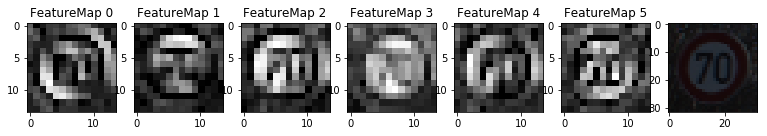

['17', 'No entry']


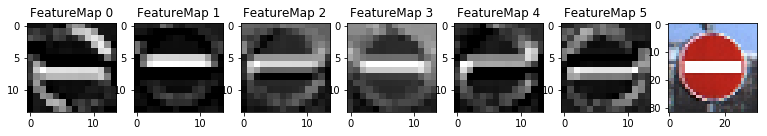

['14', 'Stop']


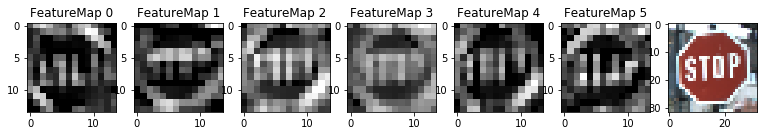

['35', 'Ahead only']


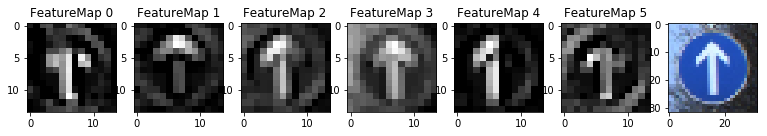

['13', 'Yield']


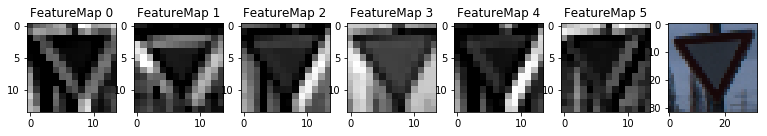

['3', 'Speed limit (60km/h)']


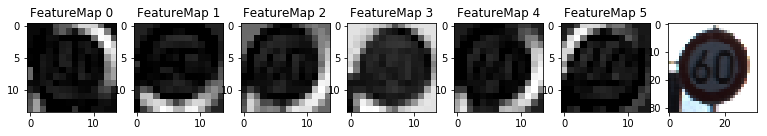

['34', 'Turn left ahead']


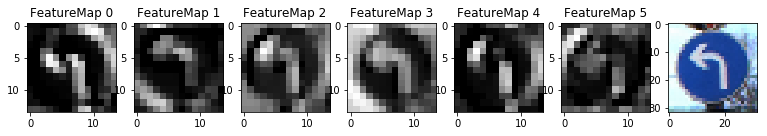

In [31]:


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sign_index = [0 for i in range(0,7)]
    for i in range(0,7,1):
        sign_index[i] = predictions[i][0]
        print(traffic_sign_name[sign_index[i]])
        #print(conv1)
        #outputFeatureMap(features_norm, i, conv1, activation_min=-1, activation_max=-1 ,plt_num=i*2+1)
        outputFeatureMap(features_norm, i, conv1, activation_min=-1, activation_max=-1 ,plt_num=i+1)
        plt.subplot(6,8, 7)
        plt.imshow(features[i])
        #outputFeatureMap(features, i, conv2, activation_min=-1, activation_max=-1 ,plt_num=i*2+2)
        plt.show()

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

When the training accuracy is less the feature maps have more blank cells (black pixels), but as the training accuracy increases we are able to see the feature map image is almost resembling the actual images. 

This shows that the weights and biases are appropriate to retain the features essential for classification.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 